## Advanced Lane Finding Project

The goals / steps of this project are the following:

* Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
* Apply a distortion correction to raw images.
* Use color transforms, gradients, etc., to create a thresholded binary image.
* Apply a perspective transform to rectify binary image ("birds-eye view").
* Detect lane pixels and fit to find the lane boundary.
* Determine the curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

---
## First, I'll compute the camera calibration using chessboard images

In [3]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [4]:
CALIBRATION_IMAGES_PATTERN = '../camera_cal/calibration*.jpg'

# Camera calibration with chess images

def camera_calibration(show_process=True, img_size=(1280, 720)):
    # prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
    objp = np.zeros((6 * 9, 3), np.float32)
    objp[:, :2] = np.mgrid[0:9, 0:6].T.reshape(-1, 2)

    # Arrays to store object points and image points from all the images.
    objpoints = []  # 3d points in real world space
    imgpoints = []  # 2d points in image plane.

    # Make a list of calibration images
    images = glob.glob(CALIBRATION_IMAGES_PATTERN)

    # Step through the list and search for chessboard corners
    for fname in images:
        img = cv2.imread(fname)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Find the chessboard corners
        ret, corners = cv2.findChessboardCorners(gray, (9, 6), None)

        # If found, add object points, image points
        if ret == True:
            objpoints.append(objp)
            imgpoints.append(corners)

            # Draw and display the corners
            if show_process:
                img = cv2.drawChessboardCorners(img, (9, 6), corners, ret)
                cv2.imshow('img', img)
                cv2.waitKey(500)

    if show_process:
        cv2.destroyAllWindows()

    if len(objpoints) > 0:
        retval, camera_matrix, dist_coeffs, _, _ = cv2.calibrateCamera(objpoints, imgpoints, img_size, None, None)
        return camera_matrix, dist_coeffs
    else:
        return None, None

## Correct image distorsion

In [5]:
def correct_distortion(img, camera_matrix, dist_coeffs):
    undist = cv2.undistort(img, camera_matrix, dist_coeffs)
    return undist

We check image undistorsion results:

Original image: 


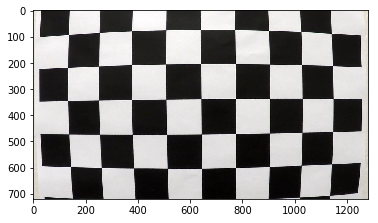

In [6]:
test_image = mpimg.imread('../camera_cal/calibration1.jpg')
print("Original image: ")
plt.imshow(test_image)

Undistorted image: 


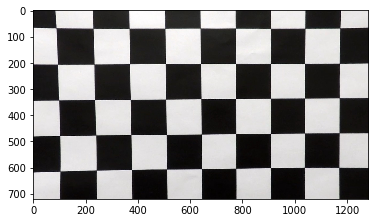

In [7]:
camera_matrix, dist_coeffs = camera_calibration(show_process=False)
undist = correct_distortion(test_image, camera_matrix, dist_coeffs)
print('Undistorted image: ')
plt.imshow(undist)

And lets check now what happens when applying these coefficients to a provided test image.

Original image: 


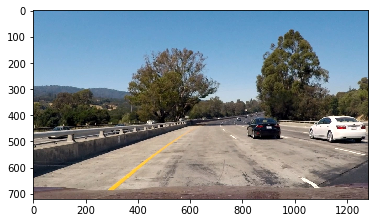

In [9]:
test_image = mpimg.imread("../test_images/test1.jpg")
print("Original image: ")
plt.imshow(test_image)

Undistorted image: 


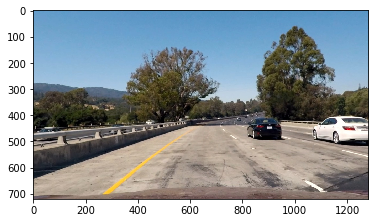

In [10]:
undist = correct_distortion(test_image, camera_matrix, dist_coeffs)
print('Undistorted image: ')
plt.imshow(undist)

## Binary image thresholding